In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)

In [4]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
df.groupby('area_type')['area_type'].agg(['count'])

,count
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [7]:
df.drop(['area_type','society','balcony','availability'],axis='columns',inplace=True)

In [8]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
def getroomnumber(a):
    return int(a.split(' ')[0])

In [14]:
df['bhk']=df['size'].apply(getroomnumber,)

In [15]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
df[df['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
def is_not_float(x):
    try :
        float(x)
    except :
        return True
    return False

In [18]:
df[df.total_sqft.apply(is_not_float)].total_sqft.unique()

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '4125Perch',
       '1120 - 1145', '3090 - 5002', '1160 - 1195', '1000Sq. Meter',
       '1115 - 1130', '1100Sq. Yards', '520 - 645', '1000 - 1285',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '716Sq. Meter', '547.34 - 827.31',
       '580 - 650', '3425 - 3435', '1804 - 2273', '3630 - 3800',
       '4000 - 5249', '1500Sq. Meter', '142.61Sq. Meter', '1574Sq. Yards',
       '1250 - 1305', '670 - 980', '1005.03 - 1252.49', '1004 - 1204',
       '361.33Sq. Yards', '645 - 936', '2710 - 3360', '2830 - 2882',
       '596 - 804', '1255 - 1863', '1300 - 1405', '117Sq. Yards',
       '934 - 1437', '980 - 1030', '2249.81 - 4112.19', '1070 - 1315',
       '3040Sq. Meter', '500Sq. Yards', '2806 - 3019', '613 - 648',
       '704 - 730', '1210 - 1477', '3369 - 3464', '1125 - 1500',
       '167Sq. Meter', '1076 - 1199',

In [19]:
def total_sqft_filter(x):
    i = x.split('-')
    if len(i) == 2:
        return (float(i[0])+float(i[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
df['total_sqft']=df['total_sqft'].apply(total_sqft_filter)

In [21]:
df[df.total_sqft.apply(is_not_float)].total_sqft.unique()

array([], dtype=float64)

In [22]:
#### End Data Cleaning

In [23]:
df1=df.copy()

In [24]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [25]:
df1.dtypes

location       object
size           object
total_sqft    float64
bath          float64
price         float64
bhk             int64
dtype: object

In [26]:
df1['price_per_sqft']=df1['price']*100000/df1['total_sqft']

In [27]:
 df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
df1.location.value_counts()

Whitefield                                      534
Sarjapur  Road                                  392
Electronic City                                 302
Kanakpura Road                                  266
Thanisandra                                     233
                                               ... 
Maragondana Halli, kr puram, old madras road      1
Kalhalli                                          1
LIC Colony                                        1
High grounds                                      1
K N Extension                                     1
Name: location, Length: 1304, dtype: int64

In [29]:
df1.location = df1.location.apply(lambda x:x.strip())

In [30]:
locations=df1.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [31]:
locations

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [32]:
len(locations[locations<=10])

1052

In [33]:
locations_under_10=locations[locations<=10]

In [34]:
locations_under_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [35]:
len(df1.location.unique())

1293

In [36]:
df1.location=df1.location.apply(lambda x: 'other' if x in locations_under_10 else x)

In [37]:
len(df1.location.unique())

242

In [38]:
# End of Feature Engineering

In [39]:
df2=df1.copy()
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [40]:
df2=df2[df2.total_sqft/df2.bhk>300]  ## outlier remove

In [41]:
df2.shape

(12274, 7)

In [42]:
df2.price_per_sqft.describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

In [43]:
import seaborn as sns

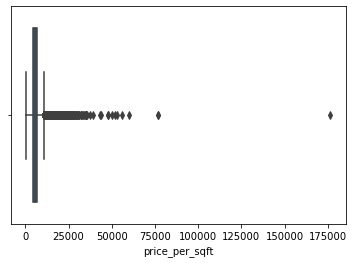

In [44]:
sns.boxplot(x=df2.price_per_sqft)

In [45]:
def remove_outlier(df):
    df_out = pd.DataFrame()
    for _, data in df.groupby('location'):
        m=np.mean(data.price_per_sqft)
        st=np.std(data.price_per_sqft)
        reduced_df = data[(data.price_per_sqft > (m-st)) & (data.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [46]:
df2=remove_outlier(df2)

In [47]:
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


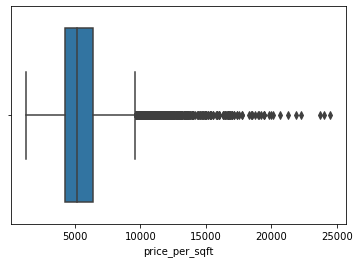

In [48]:
sns.boxplot(x=df2.price_per_sqft)

In [49]:
def plot_1(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label="2 BHK")
    plt.scatter(bhk3.total_sqft,bhk3.price,color='red',label="3 BHK")
    plt.legend()
    plt.show()

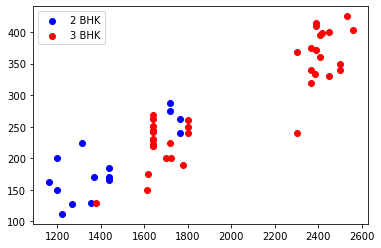

In [50]:
plot_1(df2,"Rajaji Nagar")

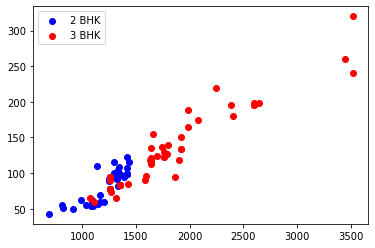

In [51]:
plot_1(df2,"Hebbal")

In [52]:
def remove_outlier_2(j):
    excluded = np.array([])
    for _,location in j.groupby('location'):
        bhk_stat = {}
        for i,bhk_df in location.groupby('bhk'):
            bhk_stat[i]={
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for i,bhk_df in location.groupby('bhk'):
            stats = bhk_stat.get(i-1)
            if stats and stats['count']>5:
                excluded = np.append(excluded,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return j.drop(excluded,axis='index')
            

In [53]:
df3=remove_outlier_2(df2)

In [54]:
df3.shape

(7164, 7)

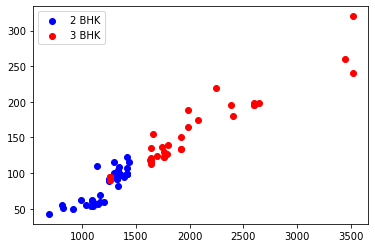

In [55]:
plot_1(df3,"Hebbal")

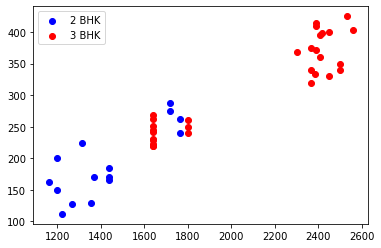

In [56]:
plot_1(df3,"Rajaji Nagar")

(array([ 523., 3546., 2259.,  441.,  237.,   97.,   39.,   13.,    5.,
           4.]),
 array([ 1300.        ,  3620.98039216,  5941.96078431,  8262.94117647,
        10583.92156863, 12904.90196078, 15225.88235294, 17546.8627451 ,
        19867.84313725, 22188.82352941, 24509.80392157]),
 <a list of 10 Patch objects>)

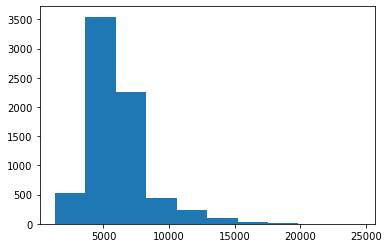

In [57]:
plt.hist(df3.price_per_sqft)

In [58]:
df3[df3.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5138,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8307,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8392,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9106,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9431,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


(array([4.677e+03, 1.733e+03, 6.440e+02, 7.400e+01, 2.600e+01, 5.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

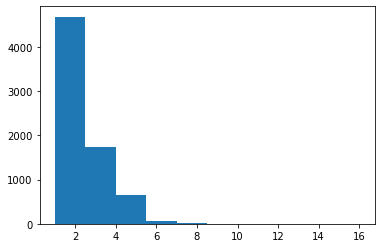

In [59]:
plt.hist(df3.bath)

In [60]:
df3[df3.bath>df3.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1565,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5099,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6562,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8232,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [61]:
df4=df3[df3.bath<df3.bhk+2]

In [62]:
df4.shape

(7088, 7)

In [63]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [64]:
df5=df4.drop(['size','price_per_sqft'],axis='columns')

In [65]:
df5.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [66]:
## End Of Feature Engineering

In [67]:
location_num = pd.get_dummies(df5.location)

In [68]:
df6=pd.concat([df5.drop('location',axis="columns"),location_num.drop('other',axis='columns')],axis='columns')

In [69]:
df6.shape

(7088, 245)

In [70]:
df6.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
X=df6.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
Y= df6.price
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [74]:
from sklearn.linear_model import LinearRegression
model1= LinearRegression()
model1.fit(X_train,Y_train)

LinearRegression()

In [75]:
model1.score(X_test,Y_test)

0.8619547725099515

In [76]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)


In [77]:
cross_val_score(LinearRegression(),X,Y,cv=cv)

array([0.86195477, 0.86419585, 0.82068946, 0.82709117, 0.89136565])

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [79]:
find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,linear_regression,0.853059,{'normalize': False}
1,lasso,0.706892,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.779326,"{'criterion': 'mse', 'splitter': 'random'}"


In [80]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model1.predict([x])[0]

In [81]:
predict_price('Indira Nagar',1000, 3, 3)


188.7853667945484

In [82]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model1,f)

In [1]:
# import pickle

In [90]:
model = pickle.load(open('banglore_home_prices_model.pickle','rb'))

In [93]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [94]:
predict_price('Indira Nagar',1000, 3, 3)


188.7853667945484

In [95]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [465]:
df5.location.unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'